<a href="https://colab.research.google.com/github/MKhromina/test_task/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1_%D0%9C%D0%93%D0%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 1.1


Данные описывают 60 объектов, каждый из которых обладает 10 признаками.Задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

In [ ]:
# подключение библиотек
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=files.upload()

Saving Практика_продвинутое_1.csv to Практика_продвинутое_1 (1).csv


In [ ]:
data = pd.read_csv('Практика_продвинутое_1.csv',  header=None)


In [ ]:
data.head() # посмотрим на первые 5 из 60 значений

,0,1,2,3,4,5,6,7,8,9
0,-21.759720,12.661154,-4.869926,9.598234,23.449185,0.154820,2.302482,-21.821396,-11.415078,2.151484
1,1.408364,-6.638400,9.211893,-5.495415,-0.645486,11.878330,-4.853190,21.437183,-15.858709,14.000808
2,2.616627,23.965814,-13.427229,3.159229,22.770143,-16.722209,1.080627,13.702021,6.303106,-0.961493
3,-23.049862,13.223549,-3.489613,9.938069,23.477814,-0.379360,0.077757,-24.087916,-11.868835,1.040066
4,4.397046,24.046032,-10.728164,2.437134,22.975698,-19.245294,1.665254,12.259758,6.068289,-1.225398


In [ ]:
data_x=np.array(data) #Объекты

Уменьшим размерность при помощи библиотеки sklearn. Отдельного внимания заслуживает параметр svd_solver, он отвечает за метод оптимизации.
Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели

**Введите координату первого объекта относительно первой главной компоненты.**

**Введите координату первого объекта относительно второй главной компоненты.**

In [ ]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(data_x).transform(data_x) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК

координаты первого столбца первой строки соответствуют  координате первого объекта относительно первой главной компоненты.

координаты второго столбца первой строки соответствуют  координате первого объекта относительно второй главной компоненты.


In [ ]:
X_transformed[0:3] # вывод первых трех объектов

array([[-32.31442582,  -4.26100973],
       [ -1.80203582,  34.00467314],
       [-17.86202529, -23.6605852 ]])

**Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты?**


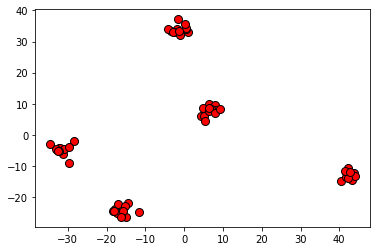

In [ ]:
plt.plot(X_transformed[:60, 0], X_transformed[:60, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

**Введите долю объясненной дисперсии при использовании первых двух главных компонент.**

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance # доля объясненной дисперсии при использовании первых двух главных компонент - второе значение массива

array([0.421, 0.69 ])

**Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85**


In [ ]:
pca_2 = PCA(n_components=10, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_full = pca_2.fit(data_x).transform(data_x) #X_full -- ndarray объектов, где каждый объект описывается всеми (10-ю) ГК

In [ ]:
explained_variance_2 = np.round(np.cumsum(pca_2.explained_variance_ratio_),3)
explained_variance_2 # доля объявленной дисперсии для i-той главной компоненты

array([0.421, 0.69 , 0.931, 0.992, 0.994, 0.996, 0.997, 0.998, 0.999,
       1.   ])

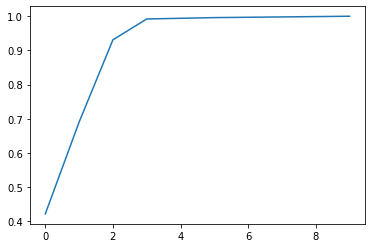

In [ ]:
plt.plot(np.arange(10), explained_variance_2, ls = '-')

# моё

In [ ]:
  F=np.array(data-data.mean()) # центрируем матрицу объектов

In [ ]:
O=1/len(F)*(np.dot(F.transpose(), F)) # находим выборочную ковариационную матрицу

In [ ]:
L, w = np.linalg.eigh(O) # Находим собственные числа  и собственные векторы матрицы О в порядке возрастания


In [ ]:
L = L/L.sum()
L=L[::-1]
for i in range(len(L)-1):
  L[i+1]+=L[i]


In [ ]:
L # np.cumsum(pca_2.explained_variance_ratio_), доля объявленной дисперсии для i-той главной компоненты

array([0.42071537, 0.69016485, 0.93124624, 0.99212525, 0.99412846,
       0.99594095, 0.99740946, 0.99845003, 0.99943979, 1.        ])

In [ ]:
Z=np.dot(F,w[::-1]) # Находим новые координаты (счеты) объектов в выбраном базисе
# w[::-1] - чтобы изменить порядок  на "по возрастанию", чтобы уменьшить ошибку MSE, т.к она = sum(L)

**Значения Z должны быть равны значениям X_full ?**

In [ ]:
Z

array([[ -3.63593707,  10.06991154, -10.58344753,   2.56978931,
          9.74855822,  20.23583508,  19.30227047, -11.92017563,
          0.45828104, -16.61860259],
       [ -2.23071333,  12.32179568, -13.84893698,   8.50061197,
         -9.53454489,  -8.89579231,  -8.17138402,  22.84783437,
        -21.68204158,   3.60068674],
       [  7.89938401,   9.91320513,  18.24567712,   2.44905625,
          9.12063553, -17.15973718,   2.98082875, -11.94741294,
         -7.60900359, -20.42652033],
       [ -4.97792739,   8.34393159, -10.86547035,   1.27041452,
          9.00830752,  22.02301201,  20.87834035, -11.62523892,
          0.89456062, -18.28118616],
       [  9.0015026 ,   8.31033598,  19.30819101,   1.55602282,
         11.31218851, -16.42437304,   4.0824545 ,  -9.86160658,
         -9.20679984, -21.30203273],
       [  9.10177586,  -5.2281712 ,  -9.35920213,   3.65714469,
         -2.82684179,  11.03050124,   3.04787761,  -3.52878359,
          6.76002848,  19.84104478],
       [  

# Упражнение 1.2
Для прохода на новогодний корпоратив в ИТМО при входе нужно отгадать «логотип мероприятия». Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение (в качестве пригласительных рассылались матрица счётов и матрица весов первых десяти ГК).


In [ ]:
data=files.upload()
#Создание массивов Numpy на основе матриц счётов и весов
scores = np.genfromtxt('X_reduced_pr_1_2.csv', delimiter=';')
loadings = np.genfromtxt('X_loadings_pr_1_2.csv', delimiter=';')


Saving X_loadings_681.csv to X_loadings_681.csv
Saving X_reduced_681.csv to X_reduced_681.csv


Найдем матрицу восстановленных данных как произведение матрицы счётов на транспонированную матрицу весов.

F=ZФ^T (Ф - транспонированная матрица)

In [ ]:
values = np.dot(scores,loadings.T)

Создадим изображение на основе полученных значений при помощи библиотеки matplotlib

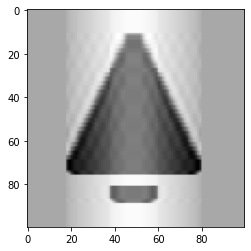

In [ ]:
%matplotlib inline
#Создание изображения
plt.imshow(values, cmap='Greys_r')